In [ ]:
import numpy as np
import pandas as pd
from keras.models import model_from_json

In [ ]:
# func to save and load file to reduce processing time
import pickle
def save(dictionary, name):
    with open(name, 'wb') as fp:
        pickle.dump(dictionary, fp, protocol=pickle.HIGHEST_PROTOCOL)

# func to load:
def load(name):
    with open(name, 'rb') as fp:
        data = pickle.load(fp)
        return data

In [ ]:
dict1=load("dictrainfall")

In [ ]:
len(dict1['adilabad'])


102

In [ ]:
def predictdistrict(name):
    ll=[]
    for i in dict1[name]:
        ll.append(dict1[name][i])
    ll=np.array(ll)

    district=ll
#     print(district," ",district.shape)
    district_train=district[:90]
    district_test=district[90:]
    xtrain,ytrain=create_dataset(district_train,10)
    xtest=create_dataset_testx(district_test,10)
    ytest=create_dataset_testy(district_test,10)
    return xtrain,ytrain,xtest,ytest

In [ ]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k]
        datax.append(x)
        y=data[i+k]
        datay.append(y)
    return np.array(datax),np.array(datay)

In [ ]:
def create_dataset_testx(data,k):
    datax=[]
    for i in range(data.shape[0]-k+1):
        x=data[i:i+k]
        datax.append(x)
    return np.array(datax)

In [ ]:
def create_dataset_testy(data,k):
    datay=[]
    for i in range(data.shape[0]-k):
         y=data[i+k]
         datay.append(y)
    return np.array(datay)

In [ ]:
districtname='lucknow'
xtrain,ytrain,xtest,ytest=predictdistrict(districtname)

In [ ]:
xtrain.shape

(80, 10, 12)

In [ ]:
ytrain.shape

(80, 12)

In [ ]:
xtest.shape

(3, 10, 12)

In [ ]:
ytest.shape

(2, 12)

In [ ]:
xtest.shape,ytest.shape

((3, 10, 12), (2, 12))

In [ ]:
import numpy as np
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Ensure xtrain and ytrain are the correct data typextrain = np.array(xtrain, dtype=np.float32)
xtrain = np.array(xtrain, dtype=np.float32)
ytrain = np.array(ytrain, dtype=np.float32)
xtest = np.array(xtest, dtype=np.float32)
ytest = np.array(ytest, dtype=np.float32)

In [ ]:
model=Sequential()
look_back=10

In [ ]:
model.add(SimpleRNN(1000, input_shape=(look_back, 12)))
model.add(Dense(12))
model.add(Dropout(0.2))  # Remove input_shape here, it's not needed
model.add(Dense(1000))
model.add(Dense(12))

optimizer = RMSprop(learning_rate=0.005)  # Use RMSprop class directly
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=100, batch_size=4)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3360 - loss: 61.3062
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5456 - loss: 39.9961
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5687 - loss: 39.2766
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5649 - loss: 41.7886
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5292 - loss: 36.2863
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5367 - loss: 39.1149
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5232 - loss: 36.5674
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5194 - loss: 37.5530
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5241 - loss: 36.9059
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5898 - loss: 36.5869
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5276 - loss: 34.3321
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
ypred=model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


In [ ]:
model.evaluate(xtest[:2],ytest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5000 - loss: 24.6003


[24.60025405883789, 0.5]

In [ ]:
ypred[0][1]

7.829681

In [ ]:
xtest.shape

(3, 10, 12)

In [ ]:
model.evaluate(xtest[:2],ytest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 24.6003


[24.60025405883789, 0.5]

In [ ]:
for i in range(ypred.shape[0]):
    for j in range(ypred.shape[1]):
        if(ypred[i][j]<0):
            ypred[i][j]=0

In [ ]:
ytest,ypred

(array([[  3.987,   2.66 ,   5.215,   7.774,  11.248,  97.278, 186.197,
         168.035,  86.39 ,  60.728,   3.184,   0.631],
        [ 20.585,  15.14 ,   4.216,   1.642,   0.787,  27.354,  98.29 ,
         227.646, 197.192,  72.494,   4.789,   4.738]], dtype=float32),
 array([[  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256],
        [  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256],
        [  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256]], dtype=float32))

In [ ]:
ytest.shape

(2, 12)

In [ ]:
import matplotlib.pyplot as plt
y_pred_flatten=ypred.ravel()
y_test_flatten=ytest
ypred1=np.vstack((y_test_flatten,ypred[2]))
ypred,ypred1

(array([[  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256],
        [  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256],
        [  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
          59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
           5.1762357,   6.2955256]], dtype=float32),
 array([[  3.987    ,   2.66     ,   5.215    ,   7.774    ,  11.248    ,
          97.278    , 186.197    , 168.035    ,  86.39     ,  60.728    ,
           3.184    ,   0.631    ],
        [ 20.585    ,  15.14     ,   4.216    ,   1.642    ,   0.787    ,
          27.354    ,  98.29     , 227.646    , 197.192    ,  72.494    ,
           4.789    ,   4.738    ],
        [  7.8483777,   7.829681 ,   0.       ,   0.       ,   

Text(0, 0.5, 'Rainfall  (in mm)')

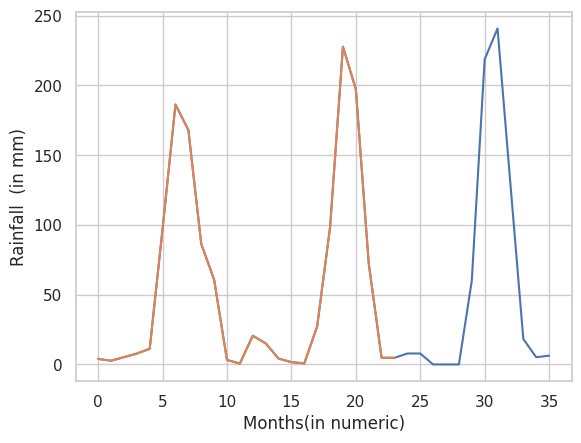

In [ ]:
plt.plot(ypred1.ravel())

plt.plot(ytest.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

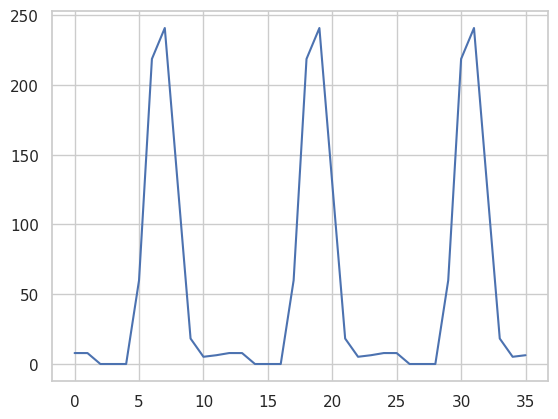

In [ ]:
plt.plot(ypred.ravel())

In [ ]:
ytest

array([[  3.987,   2.66 ,   5.215,   7.774,  11.248,  97.278, 186.197,
        168.035,  86.39 ,  60.728,   3.184,   0.631],
       [ 20.585,  15.14 ,   4.216,   1.642,   0.787,  27.354,  98.29 ,
        227.646, 197.192,  72.494,   4.789,   4.738]], dtype=float32)

In [ ]:
prediction=ypred[2]

In [ ]:
prediction

array([  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
        59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
         5.1762357,   6.2955256], dtype=float32)

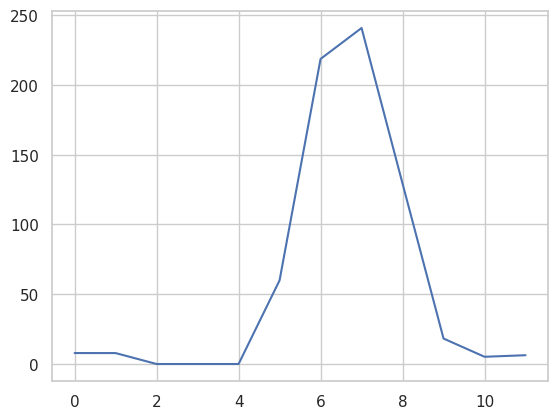

In [ ]:
plt.plot(prediction)

In [ ]:
sum1=abs(ypred[0]-ytest[0])
sum2=abs(ypred[1]-ytest[1])

In [ ]:
ytest[0]

array([  3.987,   2.66 ,   5.215,   7.774,  11.248,  97.278, 186.197,
       168.035,  86.39 ,  60.728,   3.184,   0.631], dtype=float32)

In [ ]:
sum1.sum(),sum2.sum()

(268.66327, 316.7671)

In [ ]:
ypred[2]

array([  7.8483777,   7.829681 ,   0.       ,   0.       ,   0.       ,
        59.938248 , 218.56075  , 240.72334  , 129.24828  ,  18.239658 ,
         5.1762357,   6.2955256], dtype=float32)

Text(0, 0.5, 'Rainfall (in mm)')

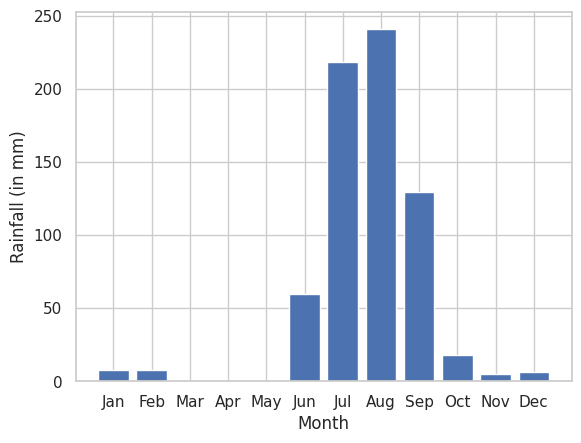

In [ ]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypred[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")

In [ ]:
import numpy as np
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Reshape the input data
xtrain1 = np.array(xtrain, dtype=np.float32)
ytrain1 = np.array(ytrain, dtype=np.float32)
xtest1 = np.array(xtest, dtype=np.float32)
ytest1 = np.array(ytest, dtype=np.float32)

# Check the shape of xtrain1
print("xtrain1 shape:", xtrain1.shape)

# If xtrain1 is 2D, reshape it to 3D
if len(xtrain1.shape) == 2:
    # Assuming the second dimension is 12 (features)
    samples, features = xtrain1.shape
    xtrain1 = xtrain1.reshape(samples, 1, features)

print("xtrain1 shape after reshape:", xtrain1.shape)

model = Sequential()
look_back = xtrain1.shape[1]  # This should be the number of time steps

model.add(LSTM(1000, input_shape=(look_back, 12)))
model.add(Dense(12))
model.add(Dropout(0.2))
model.add(Dense(1000))
model.add(Dense(12))

optimizer = RMSprop(learning_rate=0.005)
model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])
model.fit(xtrain1, ytrain1, epochs=100, batch_size=4)

xtrain1 shape: (80, 10, 12)
xtrain1 shape after reshape: (80, 10, 12)
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.2310 - loss: 75.6653
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.5783 - loss: 61.4689
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.5328 - loss: 33.5959
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.5986 - loss: 34.8725
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6550 - loss: 32.4967
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.5503 - loss: 34.0550
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.6053 - loss: 33.9240
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.5551 - loss: 31.2615
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.5478 - loss: 32.2207
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.5814 - loss: 32.1387
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 223m

In [ ]:
ypredlstm=model.predict(xtest1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [ ]:
model.evaluate(xtest1[:2],ytest1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5000 - loss: 30.9701


[30.970123291015625, 0.5]

In [ ]:
for i in range(ypredlstm.shape[0]):
    for j in range(ypredlstm.shape[1]):
        if(ypredlstm[i][j]<0):
            ypredlstm[i][j]=0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_predlstm_flatten=ypredlstm.ravel()



In [ ]:
y_test1_flatten=ytest1

In [ ]:
ypredlstm1=np.vstack((y_test1_flatten,ypredlstm[2]))

Text(0, 0.5, 'Rainfall  (in mm)')

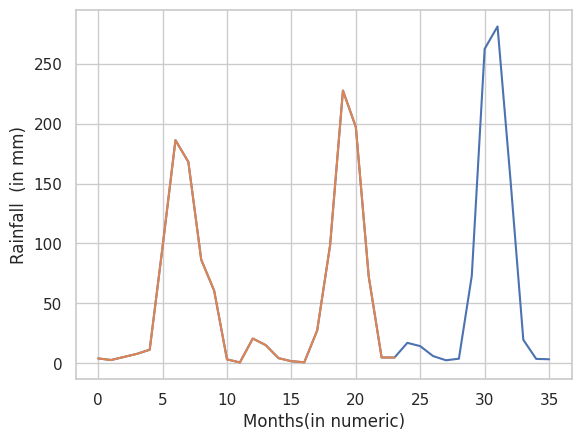

In [ ]:
plt.plot(ypredlstm1.ravel())

plt.plot(ytest1.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

Text(0, 0.5, 'Rainfall (in mm)')

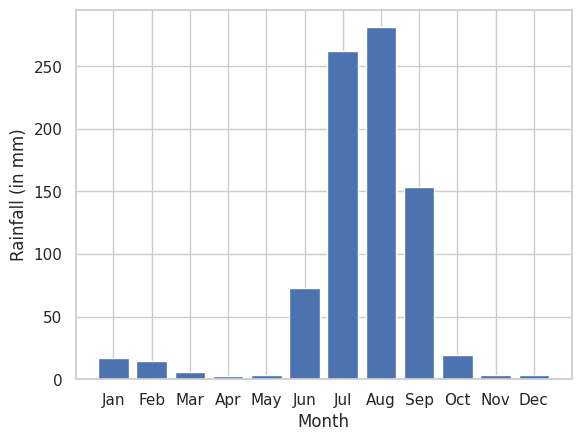

In [ ]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypredlstm[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
rnn = mean_absolute_error(ypred[0], ytest[0])
lstm = mean_absolute_error(ypredlstm[0], ytest1[0])

Text(0, 0.5, 'Rainfall  (in mm)')

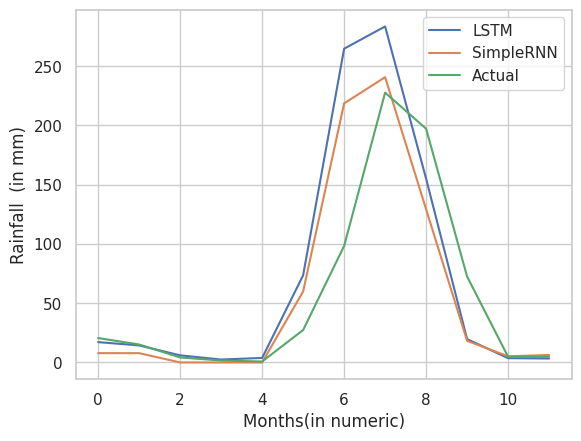

In [ ]:
plt.plot(ypredlstm[1], label="LSTM")
plt.plot(ypred[1], label='SimpleRNN')
plt.plot(ytest[1], label='Actual')
plt.xlabel("Months(in numeric)")
plt.legend()
plt.ylabel("Rainfall  (in mm)")

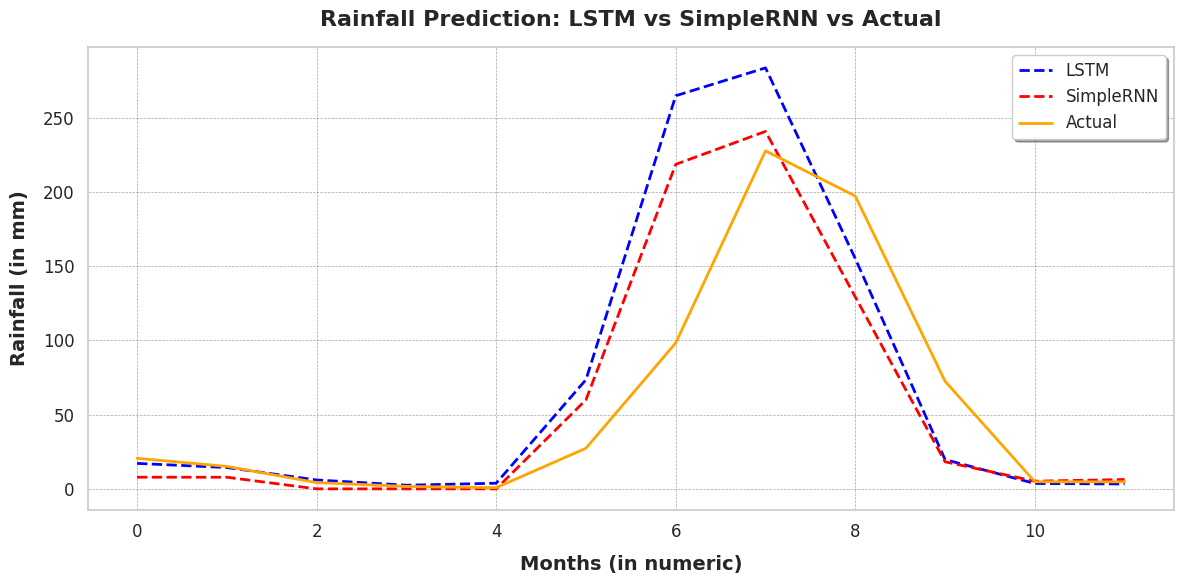

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(ypredlstm[1], label="LSTM", color="blue", linestyle='--', linewidth=2)
plt.plot(ypred[1], label="SimpleRNN", color="red", linestyle='--', linewidth=2)
plt.plot(ytest[1], label="Actual", color="orange", linestyle='-', linewidth=2)

plt.xlabel("Months (in numeric)", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Rainfall (in mm)", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Rainfall Prediction: LSTM vs SimpleRNN vs Actual", fontsize=16, fontweight="bold", pad=15)


plt.legend(fontsize=12, frameon=True, shadow=True, loc="best")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("rainfallprediction.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
rnn, lstm

(22.388605, 30.620514)